
The R0 is between 2 and 6, meaning each infected person infects 2–6 others, which can cause the number of infected to double every few days.

![Diagonal Chart](../saves/png/diagonal_chart.png "Title")

In [198]:

# https://github.com/r-dataisbeautiful/dataisbeautiful-bot
# https://sites.google.com/cdc.gov.tw/2019-ncov
# https://www.democracynow.org/2020/4/2/rana_ayyub_india_coronavirus
# https://www.fuldaerzeitung.de/regional/fulda/starb-an-patient-an-oder-mit-corona-sechs-fragen-zur-zahlweise-des-robert-koch-institus-DF9502588
# https://www.google.ca/amp/s/amp.theguardian.com/media/2020/mar/18/us-media-accuse-china-of-cold-war-mentality-after-move-to-expel-journalists
# https://www.google.ca/amp/s/amp.usatoday.com/amp/5116256002
# https://www.google.ca/amp/s/www.forbes.com/sites/carlieporterfield/2020/04/02/photos-wuhan-residents-return-to-streets-as-lockdown-eases/amp/
# https://www.scmp.com/news/china/society/article/3076989/coronavirus-10pc-recovered-patients-test-positive-later-say
# https://www.thelancet.com/journals/laninf/article/PIIS1473-3099
# https://www.worldometers.info/coronavirus/coronavirus-death-rate/#correct
# https://www.wsj.com/articles/italys-coronavirus-death-toll-is-far-higher-than-reported-11585767179

In [ ]:

import sys

command_str = '{sys.executable} -m pip install --upgrade statsmodels'.format(sys=sys)
print(command_str)
!{command_str}

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

D:\Documents\Repositories\notebooks\covid19\ipynb\Diagonal Chart.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
Pretty printing has been turned OFF


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_with', 'print_all_files_st

In [3]:

column_description_dict = s.load_object('column_description_dict')
def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_description = re.sub('^pf_', 'Personal Freedom:_', str(column_name), 1)
        column_description = re.sub('^hf_', 'Human Freedom:_', str(column_description), 1)
        column_description = re.sub('^ef_', 'Economic Freedom:_', str(column_description), 1)
        column_list = column_description.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
        column_description_dict[column_name] = column_description
        s.store_objects(column_description_dict=column_description_dict)
    
    return column_description

In [ ]:

!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(notebook_path))}"

In [13]:

columns_list = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        df = eval("s.load_object('{}')".format(df_name))
        if len(set(columns_list) - set(df.columns)) == 0:
            print("{} = s.load_object('{}')".format(df_name, df_name))
            print("{}".format(df_name))

arkansas_df = s.load_object('arkansas_df')
arkansas_df
california_df = s.load_object('california_df')
california_df
colorado_df = s.load_object('colorado_df')
colorado_df
czech_df = s.load_object('czech_df')
czech_df
florida_df = s.load_object('florida_df')
florida_df
germany_df = s.load_object('germany_df')
germany_df
illinois_df = s.load_object('illinois_df')
illinois_df
iran_df = s.load_object('iran_df')
iran_df
italy_df = s.load_object('italy_df')
italy_df
new_york_df = s.load_object('new_york_df')
new_york_df
oregon_df = s.load_object('oregon_df')
oregon_df
slovakia_df = s.load_object('slovakia_df')
slovakia_df
south_carolina_df = s.load_object('south_carolina_df')
south_carolina_df
south_korea_df = s.load_object('south_korea_df')
south_korea_df
spain_df = s.load_object('spain_df')
spain_df
tennessee_df = s.load_object('tennessee_df')
tennessee_df
uk_df = s.load_object('uk_df')
uk_df
usa_df = s.load_object('usa_df')
usa_df
vermont_df = s.load_object('vermont_df')
vermont_df



---

In [14]:

arkansas_df = s.load_object('arkansas_df')
california_df = s.load_object('california_df')
colorado_df = s.load_object('colorado_df')
florida_df = s.load_object('florida_df')
illinois_df = s.load_object('illinois_df')
new_york_df = s.load_object('new_york_df')
oregon_df = s.load_object('oregon_df')
south_carolina_df = s.load_object('south_carolina_df')
tennessee_df = s.load_object('tennessee_df')
vermont_df = s.load_object('vermont_df')

In [19]:

from datetime import date

def merge_dfs(merge_df, df_name, columns_list=['Confirmed_Cumulative', 'Deaths_Cumulative']):
    df = s.load_object(df_name)
    df.Date = df.Date.map(lambda ts: date(ts.year, ts.month, ts.day))
    df.set_index('Date', drop=True, inplace=True)
    country_suffix = '_{}'.format(df_name[:-3])
    merge_df = merge_df.merge(df[columns_list], how='outer', left_index=True, right_index=True,
                              suffixes=('_merge', country_suffix))
    if merge_df.index.has_duplicates:
        raise RuntimeError('{} has duplicates'.format(df_name))
    columns_list = merge_df.columns.tolist()
    columns_list[-2] = columns_list[-2] + country_suffix
    columns_list[-1] = columns_list[-1] + country_suffix
    merge_df.columns = columns_list
    
    return merge_df

In [36]:

def create_day_df(column_name, idx, name_suffix):
    new_name = '{}_day_{}'.format(column_name[idx:], name_suffix)
    columns_list = [new_name, column_name]
    df = pd.DataFrame(merge_df[columns_list].values, columns=columns_list, index=merge_df.index)
    df.set_index(new_name, drop=True, inplace=True)
    df.columns = [' '.join(cn[idx:].split('_')).title() for cn in df.columns]
    
    return df

In [164]:

merge_df = pd.DataFrame([])
df_name_list = ['arkansas_df', 'california_df', 'colorado_df', 'florida_df', 'illinois_df', 'new_york_df', 'oregon_df',
                'south_carolina_df', 'tennessee_df', 'vermont_df']
for df_name in df_name_list:
    merge_df = merge_dfs(merge_df, df_name)

In [165]:

merge_df.sample(5).T.sample(5).T

,Deaths_Cumulative_vermont,Confirmed_Cumulative_illinois,Confirmed_Cumulative_south_carolina,Deaths_Cumulative_illinois,Deaths_Cumulative_florida
Date,,,,,
2020-03-05,NaN,5.0,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN
2020-03-23,5.0,1285.0,298.0,12.0,12.0
2020-03-10,0.0,19.0,9.0,NaN,NaN
2020-03-20,2.0,585.0,125.0,5.0,11.0


In [166]:

cc_prefix = 'Confirmed_Cumulative_'
confirms_list = [cn for cn in merge_df.columns.tolist() if cn.startswith(cc_prefix)]
confirms_list

['Confirmed_Cumulative_arkansas', 'Confirmed_Cumulative_california', 'Confirmed_Cumulative_colorado', 'Confirmed_Cumulative_florida', 'Confirmed_Cumulative_illinois', 'Confirmed_Cumulative_new_york', 'Confirmed_Cumulative_oregon', 'Confirmed_Cumulative_south_carolina', 'Confirmed_Cumulative_tennessee', 'Confirmed_Cumulative_vermont']

In [167]:

dc_prefix = 'Deaths_Cumulative_'
deaths_list = [cn for cn in merge_df.columns.tolist() if cn.startswith(dc_prefix)]
deaths_list

['Deaths_Cumulative_arkansas', 'Deaths_Cumulative_california', 'Deaths_Cumulative_colorado', 'Deaths_Cumulative_florida', 'Deaths_Cumulative_illinois', 'Deaths_Cumulative_new_york', 'Deaths_Cumulative_oregon', 'Deaths_Cumulative_south_carolina', 'Deaths_Cumulative_tennessee', 'Deaths_Cumulative_vermont']

In [168]:

dc_idx = len(dc_prefix)
dc_suffix = 'dc'
cc_idx = len(cc_prefix)
cc_suffix = 'cc'
for cc_column_name, dc_column_name in zip(confirms_list, deaths_list):
    
    # Get the date of the first death
    #merge_df[dc_column_name] = merge_df[dc_column_name].map(lambda x: re.sub('[^\d]+', '', str(x)))
    merge_df[dc_column_name] = pd.to_numeric(merge_df[dc_column_name], errors='coerce')
    mask_series = merge_df[dc_column_name].isnull() | (merge_df[dc_column_name] == 0)
    ts0 = merge_df[~mask_series].index.min()
    new_name = '{}_day_{}'.format(dc_column_name[dc_idx:], dc_suffix)
    merge_df[new_name] = (merge_df.index - ts0).days
    
    #merge_df[cc_column_name] = merge_df[cc_column_name].map(lambda x: re.sub('[^\d]+', '', str(x)))
    merge_df[cc_column_name] = pd.to_numeric(merge_df[cc_column_name], errors='coerce')
    #mask_series = merge_df[cc_column_name].isnull() | (merge_df[cc_column_name] == 0)
    #ts0 = merge_df[~mask_series].index.min()
    new_name = '{}_day_{}'.format(cc_column_name[cc_idx:], cc_suffix)
    merge_df[new_name] = (merge_df.index - ts0).days

In [169]:

merge_df.columns.tolist()

['Confirmed_Cumulative_arkansas', 'Deaths_Cumulative_arkansas', 'Confirmed_Cumulative_california', 'Deaths_Cumulative_california', 'Confirmed_Cumulative_colorado', 'Deaths_Cumulative_colorado', 'Confirmed_Cumulative_florida', 'Deaths_Cumulative_florida', 'Confirmed_Cumulative_illinois', 'Deaths_Cumulative_illinois', 'Confirmed_Cumulative_new_york', 'Deaths_Cumulative_new_york', 'Confirmed_Cumulative_oregon', 'Deaths_Cumulative_oregon', 'Confirmed_Cumulative_south_carolina', 'Deaths_Cumulative_south_carolina', 'Confirmed_Cumulative_tennessee', 'Deaths_Cumulative_tennessee', 'Confirmed_Cumulative_vermont', 'Deaths_Cumulative_vermont', 'arkansas_day_dc', 'arkansas_day_cc', 'california_day_dc', 'california_day_cc', 'colorado_day_dc', 'colorado_day_cc', 'florida_day_dc', 'florida_day_cc', 'illinois_day_dc', 'illinois_day_cc', 'new_york_day_dc', 'new_york_day_cc', 'oregon_day_dc', 'oregon_day_cc', 'south_carolina_day_dc', 'south_carolina_day_cc', 'tennessee_day_dc', 'tennessee_day_cc', 'verm

In [170]:

day_merge_df = pd.DataFrame([])
for cc_column_name in confirms_list:
    day_merge_df = day_merge_df.merge(create_day_df(cc_column_name, cc_idx, cc_suffix), how='outer', left_index=True,
                                      right_index=True, suffixes=('_merge', '_{}'.format(cc_column_name)))
day_merge_df.interpolate(axis='index', limit_area='inside', inplace=True)
day_merge_df.sample(5).T.sample(5).T

,California,Illinois,Oregon,Vermont,South Carolina
-21.0,15.038462,2.80,NaN,NaN,NaN
-15.0,25.884615,4.00,1.0,NaN,NaN
5.0,133.000000,1049.00,88.0,95.0,173.0
-1.0,51.192308,105.00,30.0,19.0,28.0
-34.0,2.500000,2.45,NaN,NaN,NaN


In [172]:

for column_name in deaths_list:
    day_merge_df = day_merge_df.merge(create_day_df(column_name, dc_idx, dc_suffix), how='outer', left_index=True,
                                      right_index=True, suffixes=(' Confirmations', ' Deaths'))
day_merge_df.interpolate(axis='index', limit_area='inside', inplace=True)
day_merge_df.sample(5).T.sample(5).T

,California Deaths,South Carolina Deaths,Illinois Deaths,Florida Confirmations,Colorado Confirmations
-6.0,0.769231,NaN,NaN,11.0,8.0
-56.0,NaN,NaN,NaN,NaN,NaN
-11.0,0.576923,NaN,NaN,2.5,NaN
-10.0,0.615385,NaN,NaN,3.0,NaN
-43.0,NaN,NaN,NaN,NaN,NaN


In [182]:

columns_list = [cn for cn in day_merge_df.columns if 'york' in cn.lower()]
mask_series = day_merge_df[columns_list[0]].isnull() | day_merge_df[columns_list[1]].isnull()
day_merge_df[~mask_series][columns_list]

,New York Confirmations,New York Deaths
-13.0,1.0,0.0
-12.0,1.0,0.0
-11.0,2.0,0.0
-10.0,11.0,0.0
-9.0,22.0,0.0
-8.0,44.0,0.0
-7.0,89.0,0.0
-6.0,105.0,0.0
-5.0,142.0,0.0
-4.0,173.0,0.0


In [176]:

cs = ' Confirmations'
cr = re.compile(cs)
tuple_list = [(cn, cr.sub(' Deaths', cn)) for cn in day_merge_df.columns if cn.endswith(cs)]
tuple_list

[('Arkansas Confirmations', 'Arkansas Deaths'), ('California Confirmations', 'California Deaths'), ('Colorado Confirmations', 'Colorado Deaths'), ('Florida Confirmations', 'Florida Deaths'), ('Illinois Confirmations', 'Illinois Deaths'), ('New York Confirmations', 'New York Deaths'), ('Oregon Confirmations', 'Oregon Deaths'), ('South Carolina Confirmations', 'South Carolina Deaths'), ('Tennessee Confirmations', 'Tennessee Deaths'), ('Vermont Confirmations', 'Vermont Deaths')]

In [197]:

confirms_cn

'New York Confirmations'

The mortality rate for New York is 1.0%.


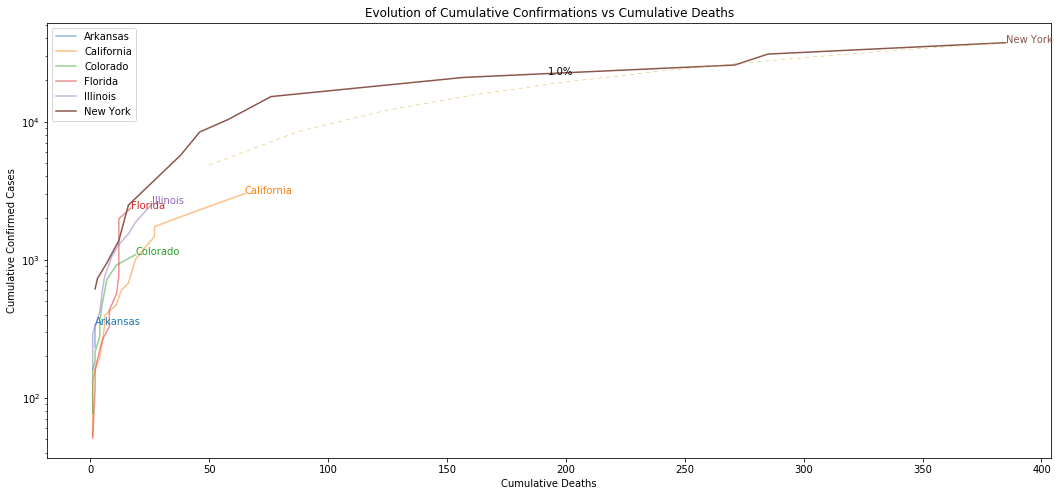

In [201]:

import numpy as np

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_ylabel('Cumulative Confirmed Cases')
ax.set_xlabel('Cumulative Deaths')
ax.set_title('Evolution of Cumulative Confirmations vs Cumulative Deaths')
ax.set_yscale('log')
mask_series = (day_merge_df.index >= 0)
for state_tuple in tuple_list:
    confirms_cn = state_tuple[0]
    deaths_cn = state_tuple[1]
    df = day_merge_df[mask_series][list(state_tuple)].dropna(axis='index', how='any')
    label = cr.sub('', confirms_cn)
    
    # plot('xlabel', 'ylabel', data=obj)
    Line2D_obj = ax.plot(deaths_cn, confirms_cn, data=df, label=label)[0]
    
    y = df[confirms_cn].iloc[-1]
    x = df[deaths_cn].iloc[-1]
    color = Line2D_obj.get_color()
    annotation = plt.annotate(label, xy=(x, y), color=color)
    if (label == 'New York'):
        Line2D_obj.set_alpha(alpha=1.0)
        break
    else:
        Line2D_obj.set_alpha(alpha=0.5)
kwargs = dict(color='goldenrod', linewidth=0.4, dashes=(10, 10))
last_series = new_york_df.iloc[-1]
first_series = new_york_df.iloc[0]
x = np.linspace(50, last_series.Deaths_Cumulative, 10)
f = last_series.Confirmed_Cumulative / last_series.Deaths_Cumulative
y = np.linspace(x[0]*f, x[-1]*f, 10)
Line2D_obj = ax.plot(x, y, **kwargs)[0]
xy = (x[-1]/2, y[-1]/i)
annotation = plt.annotate('{}%'.format(round(100/f, 1)), xy=xy)
print('The mortality rate for New York is {}%.'.format(round((last_series.Deaths_Cumulative / last_series.Confirmed_Cumulative)*100, 1)))
legend_obj = plt.legend()

The mortality rate for New York is 1.0%.


In [144]:

last_series

Date                    2020-03-26T00:00:00.000000000
Confirmed_Cumulative                            37258
Deaths_Cumulative                                 385
Confirmed_New                                    6447
Deaths_New                                        100
Name: 27, dtype: object

In [ ]:

bottom, top = ax.get_xlim()
x = np.linspace(bottom, top, 10)
for i in [1.0, 1.7]:
    Line2D_obj = ax.plot(x, 100*x/i, **kwargs)[0]
    xy = (x[-1]/2, 50*x[-1]/i)
    annotation = plt.annotate('{}%'.format(i), xy=xy)

The mortality rate for New York is 1.0%.


96.77402597402597

In [127]:

last_series = colorado_df.iloc[-1]
print('The mortality rate for Colorado is {}%.'.format(round((last_series.Deaths_Cumulative / last_series.Confirmed_Cumulative)*100, 1)))

The mortality rate for Colorado is 1.7%.
